# importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/big_mart_train.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6610,NCY17,18.200,Low Fat,0.163065,Health and Hygiene,43.3086,OUT035,2004,Small,Tier 2,Supermarket Type1,758.3462
5514,FDW02,4.805,Regular,0.037699,Dairy,125.5704,OUT046,1997,Small,Tier 1,Supermarket Type1,3880.2824
1345,FDM36,11.650,Regular,0.058720,Baking Goods,171.1422,OUT035,2004,Small,Tier 2,Supermarket Type1,2931.5174
262,FDG28,9.285,Regular,0.049559,Frozen Foods,246.4144,OUT017,2007,NaN,Tier 2,Supermarket Type1,1225.0720
1765,FDI57,NaN,Low Fat,0.053764,Seafood,195.7768,OUT027,1985,Medium,Tier 3,Supermarket Type3,3547.3824


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
per = data.isnull().sum() *  100 / len(data)
print(per) 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

# univariate imputation

In [13]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [15]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [18]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [20]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [21]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


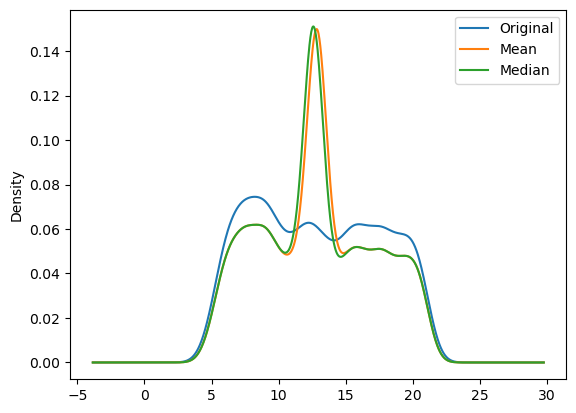

In [22]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<AxesSubplot:>

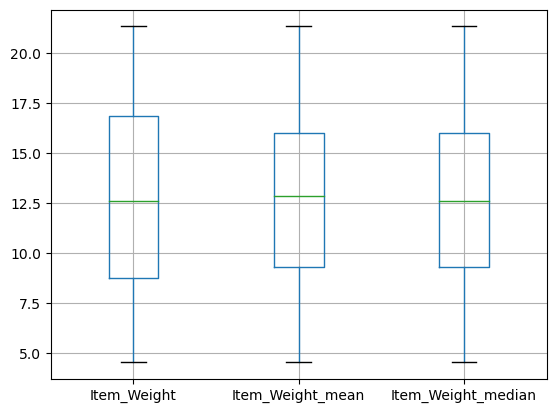

In [23]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [24]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

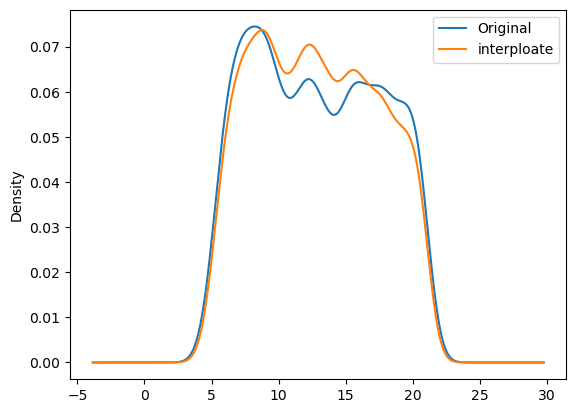

In [25]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

# Multivariate Impute

In [26]:
from sklearn.impute import KNNImputer

In [27]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [28]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

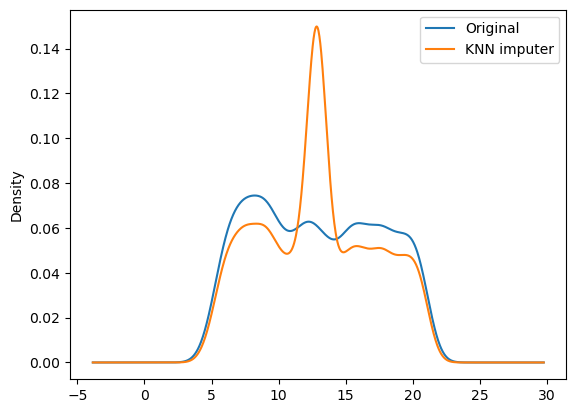

In [29]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [30]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [31]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

# Outlet_size 
(handling the missing value for categorical variable using mode)

In [33]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [34]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [35]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [36]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
missing_values = data['Outlet_Size'].isnull()

In [38]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [39]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [40]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64